In [45]:
## Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')

In [46]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 62A3-3A7F

 Directory of C:\Users\Jasrotia\Desktop\bz_data-ecommerce

06/21/2019  01:12 PM    <DIR>          .
06/21/2019  01:12 PM    <DIR>          ..
06/21/2019  01:12 PM            12,496 E-Commerce_data_analysis.ipynb
11/29/2018  12:23 PM         9,033,957 olist_customers_dataset.csv
11/29/2018  12:23 PM        61,273,883 olist_geolocation_dataset.csv
11/29/2018  12:23 PM        17,654,914 olist_orders_dataset.csv
11/29/2018  12:23 PM        15,438,671 olist_order_items_dataset.csv
11/29/2018  12:23 PM         5,777,138 olist_order_payments_dataset.csv
11/29/2018  12:23 PM        14,409,007 olist_order_reviews_dataset.csv
11/29/2018  12:23 PM         2,379,446 olist_products_dataset.csv
11/29/2018  12:23 PM           174,703 olist_sellers_dataset.csv
11/29/2018  12:23 PM             2,613 product_category_name_translation.csv
              10 File(s)    126,156,828 bytes
               2 Dir(s)  13,951,332,352 bytes free


In [47]:
order=pd.read_csv("olist_orders_dataset.csv")
customer=pd.read_csv("olist_customers_dataset.csv")
payment=pd.read_csv("olist_order_payments_dataset.csv")
product=pd.read_csv("olist_products_dataset.csv")
geo=pd.read_csv("olist_geolocation_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")

In [48]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [49]:
customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [50]:
payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [51]:
product.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [52]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [53]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [54]:
product.shape

(32951, 9)

In [55]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [56]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Joining two datasets

In [57]:
order_pay=pd.merge(order,payment,how='left',on=['order_id','order_id'])

In [58]:
order_pay.shape

(103887, 12)

In [59]:
print("Total number of order in the dataset",order['order_id'].nunique())
print("Total number of customer in the dataset",order['customer_id'].nunique()) # nunique() counts no of unique elements

Total number of order in the dataset 99441
Total number of customer in the dataset 99441


In [60]:
status=order.groupby('order_status')['order_id'].nunique()
status

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [61]:
print("Maximum order amount is ",order_pay['payment_value'].max())
print("Minimum order amount is ",order_pay['payment_value'].min())
print("Mean order amount is ",order_pay['payment_value'].mean())
print("Median order amount is ",order_pay['payment_value'].median())

Maximum order amount is  13664.08
Minimum order amount is  0.0
Mean order amount is  154.10038041698772
Median order amount is  100.0


### Top 5 expensive products for sales

In [62]:
value=order_pay.groupby('order_id')['payment_value'].sum().sort_values(ascending=False)

In [63]:
value.head()

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
Name: payment_value, dtype: float64

In [64]:
order_pay[order_pay['payment_value'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
32133,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,NaN,NaN,NaN,NaN


In [65]:
order_pay['payment_value'].fillna(0,inplace=True)

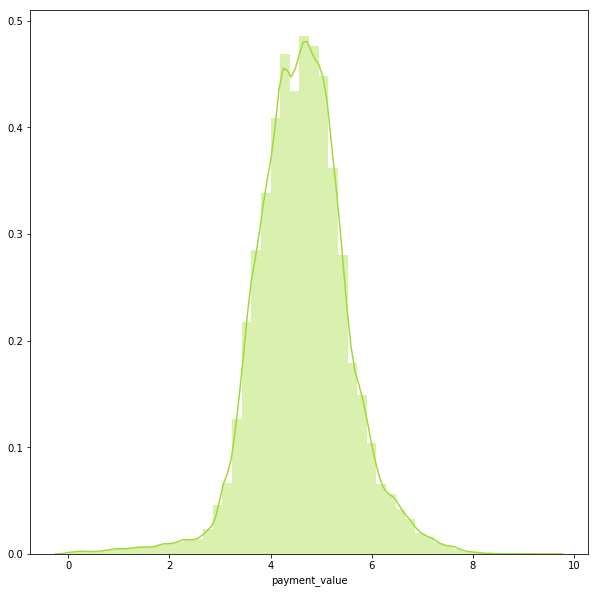

In [66]:
plt.figure(figsize=(10,10))
g=sns.distplot(np.log(order_pay['payment_value']+1))

### Most sold product in categories

In [67]:
mostsold=product['product_category_name'].value_counts().reindex()

In [68]:
mostsold.unique

<bound method Series.unique of cama_mesa_banho                                  3029
esporte_lazer                                    2867
moveis_decoracao                                 2657
beleza_saude                                     2444
utilidades_domesticas                            2335
automotivo                                       1900
informatica_acessorios                           1639
brinquedos                                       1411
relogios_presentes                               1329
telefonia                                        1134
bebes                                             919
perfumaria                                        868
papelaria                                         849
fashion_bolsas_e_acessorios                       849
cool_stuff                                        789
ferramentas_jardim                                753
pet_shop                                          719
eletronicos                                       5

In [69]:
order.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [70]:
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])

In [71]:
order['year']=order['order_purchase_timestamp'].dt.year
order['month']=order['order_purchase_timestamp'].dt.month
order['weekday']=order['order_purchase_timestamp'].dt.weekday_name
order['hour']=order['order_purchase_timestamp'].dt.hour

In [72]:
order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
year                                      int64
month                                     int64
weekday                                  object
hour                                      int64
dtype: object

In [73]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,weekday,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,Monday,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,Tuesday,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,Wednesday,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,11,Saturday,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,2,Tuesday,21


In [74]:
order_pay2=pd.merge(order,payment,how='left',on=['order_id','order_id'])     
order_pay2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,weekday,hour,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,Monday,10,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,Monday,10,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,10,Monday,10,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,7,Tuesday,20,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,8,Wednesday,8,1.0,credit_card,3.0,179.12


### Trends by Years

In [75]:
trends_year=pd.DataFrame(order_pay2.groupby('year')['payment_value'].sum().sort_values(ascending=True)).reset_index()
trends_year

,year,payment_value
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05


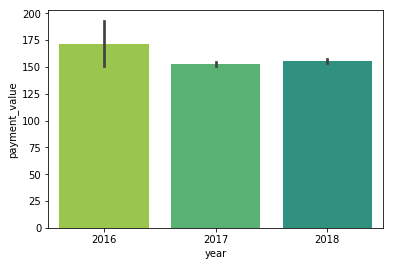

In [76]:
sns.barplot(x='year',y="payment_value",data=order_pay2)

#### Box plot for transaction year

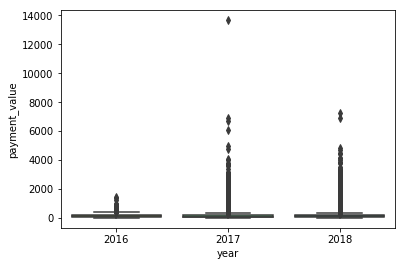

In [77]:
sns.set_palette(palette='viridis_r')
sns.boxplot(x='year',y='payment_value',data=order_pay2)

## Average value of transaction per month

In [78]:
trend_month=pd.DataFrame(order_pay2.groupby('month').agg({'payment_value':'mean'}).rename(columns=
                                                    {'payment_value':'mean_transaction'})).reset_index()
x1=trend_month.month.tolist()
y1=trend_month.mean_transaction.tolist()
mapp={}
trend_month

,month,mean_transaction
0,1,148.994677
1,2,145.323755
2,3,155.523792
3,4,161.408334
4,5,157.676773
5,6,155.774417
6,7,153.263458
7,8,150.855409
8,9,161.511407
9,10,161.228972


Text(0, 0.5, 'Value')

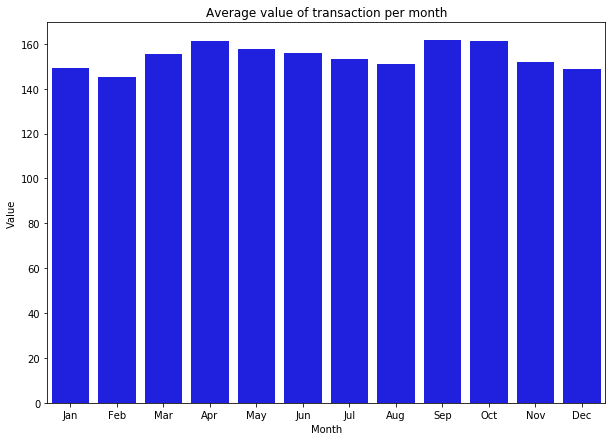

In [79]:
for m,v in zip(x1, y1):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x1)]#list comprehension
vn = [mapp[x] for x in sorted(x1)] #list comprehension

plt.figure(figsize=(10,7))
ax=sns.barplot(x=xn,y=vn, color='#0000FF')
ax.set_title("Average value of transaction per month")
ax.set_xlabel('Month')
ax.set_ylabel('Value')

## Transaction per weekdays

In [80]:
freq_weekday=pd.DataFrame(order.groupby('weekday').agg({'order_id':'count'}).rename(columns={'order_id':'order_count'})).reset_index()

Text(0, 0.5, 'Value')

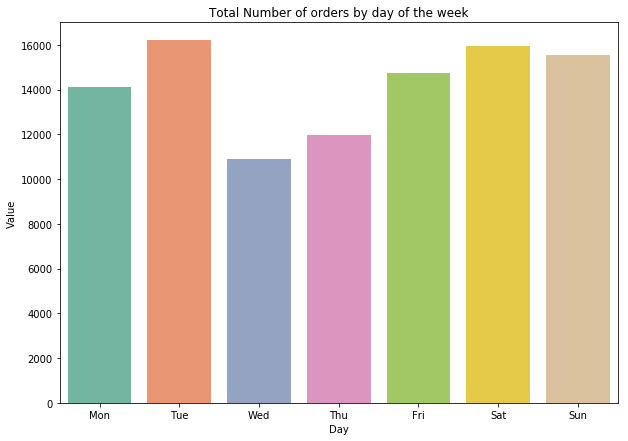

In [81]:
x3 = freq_weekday.index.tolist()
y3 = freq_weekday.order_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x3 = [weekmap[x] for x in x3]
wkmp = {}
for j,x in enumerate(x3):
    wkmp[x] = y3[j]
order_week = list(weekmap.values())
ordervals = [wkmp[val] for val in order_week]

plt.figure(figsize=(10,7))
ax=sns.barplot(x=order_week,y=ordervals, palette=sns.color_palette(palette="Set2"))
ax.set_title("Total Number of orders by day of the week")
ax.set_xlabel('Day')
ax.set_ylabel('Value')

## Trends by hours

In [82]:
trend_hour=order.groupby('hour').agg({'order_id':'count'}).rename(columns={'order_id':'freq_order'}).reset_index()

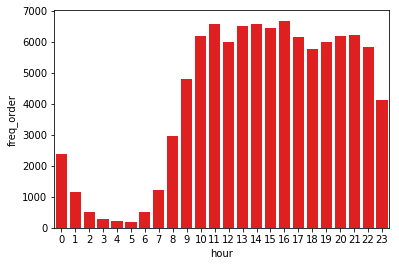

In [83]:
sns.barplot(x=trend_hour['hour'],y=trend_hour['freq_order'],color='red')

## Frequency of order during day's hour

In [84]:
day_hour=order.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [85]:
day_hour.weekday=day_hour.weekday.map(weekmap)
day_hour.head()

,weekday,hour,freq
0,NaN,0,426
1,NaN,1,216
2,NaN,2,72
3,NaN,3,49
4,NaN,4,40


In [86]:
h=day_hour['hour'].values
freq=day_hour['freq'].values
print(len(h),len(freq))

168 168


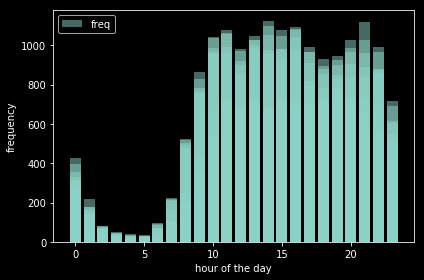

In [87]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    plt.bar(h,freq,alpha=0.5,align='center',label='freq')
    plt.ylabel("frequency")
    plt.xlabel('hour of the day')
    plt.legend(loc="best")
    plt.tight_layout()

## Year wise monthly distribution of payment value

[Text(0.5, 1.0, 'Year wise monthly distribution of payment value')]

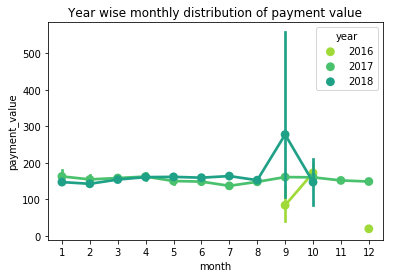

In [88]:
fig,ax=plt.subplots()
sns.pointplot(data=order_pay2[['month',
                              'payment_value',
                              'year']],
             x='month',y='payment_value',
             hue='year',ax=ax)
ax.set(title="Year wise monthly distribution of payment value")